<a href="https://colab.research.google.com/github/DHARMADEVIKEERTHI/Elevate-7---Get-Basic-Sales-Summary-from-a-Tiny-SQLite-Database-using-Python/blob/main/Elevate_7_Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to a new database file
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
# Insert data
sales_data = [
     ('Apple iPhone 14', 5, 799),
    ('Samsung Galaxy S23', 8, 749),
    ('Dell Inspiron 15', 3, 650),
    ('HP Pavilion x360', 4, 720),
    ('Sony WH-1000XM5', 10, 350),
    ('Apple iPhone 14', 2, 799),
    ('Samsung Galaxy S23', 4, 749),
    ('Sony WH-1000XM5', 6, 350),
    ('Logitech MX Master 3', 12, 99),
    ('Lenovo ThinkPad X1', 2, 1200),
    ('Nike Air Max 270', 6, 130),
    ('Adidas Ultraboost 22', 5, 180),
    ('Philips Air Fryer XXL', 3, 250),
    ('LG 4K Smart TV 55"', 2, 700),
    ('Fossil Gen 6 Smartwatch', 4, 299),
    ('Canon EOS 200D DSLR', 2, 599),
    ('Apple MacBook Air M2', 1, 1099),
    ('Bose SoundLink Flex', 7, 149),
    ('JBL Flip 6 Bluetooth Speaker', 9, 120),
    ('Xiaomi Mi Band 7', 10, 50)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

conn.commit()
conn.close()

In [6]:
# Connect to database
conn = sqlite3.connect("sales_data.db")

In [7]:
# Run query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [8]:
# Load into DataFrame
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

In [9]:
# Display result
print("Sales Summary:")
print(df)

Sales Summary:
                         product  total_qty  revenue
0           Adidas Ultraboost 22          5    900.0
1           Apple MacBook Air M2          1   1099.0
2                Apple iPhone 14          7   5593.0
3            Bose SoundLink Flex          7   1043.0
4            Canon EOS 200D DSLR          2   1198.0
5               Dell Inspiron 15          3   1950.0
6        Fossil Gen 6 Smartwatch          4   1196.0
7               HP Pavilion x360          4   2880.0
8   JBL Flip 6 Bluetooth Speaker          9   1080.0
9             LG 4K Smart TV 55"          2   1400.0
10            Lenovo ThinkPad X1          2   2400.0
11          Logitech MX Master 3         12   1188.0
12              Nike Air Max 270          6    780.0
13         Philips Air Fryer XXL          3    750.0
14            Samsung Galaxy S23         12   8988.0
15               Sony WH-1000XM5         16   5600.0
16              Xiaomi Mi Band 7         10    500.0


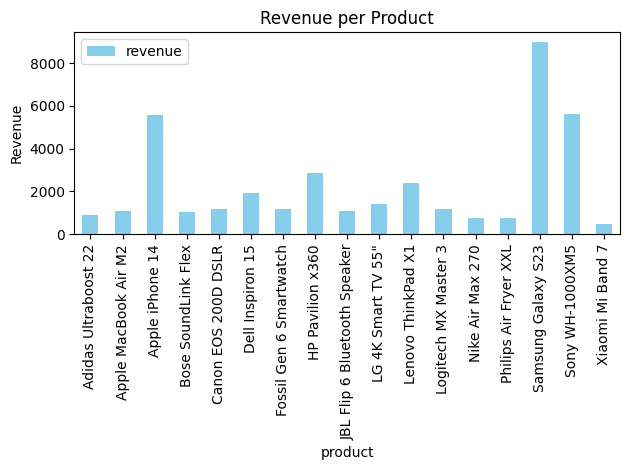

In [10]:
# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', title='Revenue per Product', color='skyblue')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()